# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que re√∫ne dados sobre transa√ß√µes de compras em uma loja de varejo.

Vamos utiliz√°-lo para praticar a explora√ß√£o de data sets utilizando pandas. Voc√™ pode fazer toda an√°lise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, n√£o modifique o nome das fun√ß√µes de resposta.

### Importa√ß√µes

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
black_friday = pd.read_csv("black_friday.csv")

### Informa√ß√µes b√°sicas

In [16]:
black_friday.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [17]:
black_friday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [40]:
black_friday.shape

(537577, 12)

In [45]:
black_friday.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

### An√°lise de explorat√≥ria  

* **Qual o g√™nero e estado civil dos maiores consumidores?**

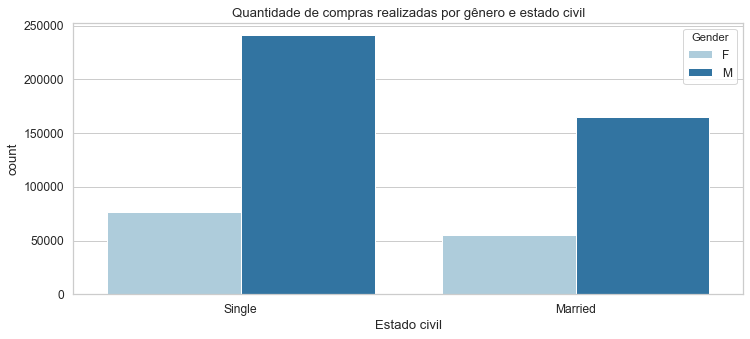

In [30]:
marital_gender = black_friday[['Gender', 'Marital_Status']]
marital_gender['Marital_Status'].replace(to_replace = [0, 1], value = ['Single', 'Married'], inplace=True)
sns.set(style='whitegrid', palette = 'Paired', font_scale=1.1, rc={"figure.figsize": [12, 5]})
sns.countplot(x='Marital_Status', hue='Gender', data=marital_gender);
plt.xlabel('Estado civil')
plt.title('Quantidade de compras realizadas por g√™nero e estado civil');

Atrav√©s da an√°lise podemos observar que homens solteiros s√£o os maiores consumidores na Black Friday.

* **Qual faixa et√°ria consome mais na Black Friday?**

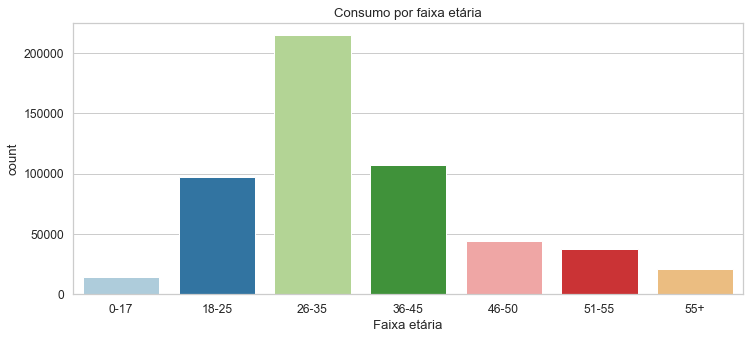

In [21]:
age_order = sorted(black_friday['Age'].unique())
sns.countplot(x='Age', order=age_order, data=black_friday);
plt.xlabel('Faixa et√°ria')
plt.title('Consumo por faixa et√°ria');

Os maiores consumidores pertencem a faixa et√°ria de 26-35 anos. Mas s√£o eles que realizam as compras de maior valor?

* **Qual faixa et√°ria realiza compras de maior valor na Black Friday?**

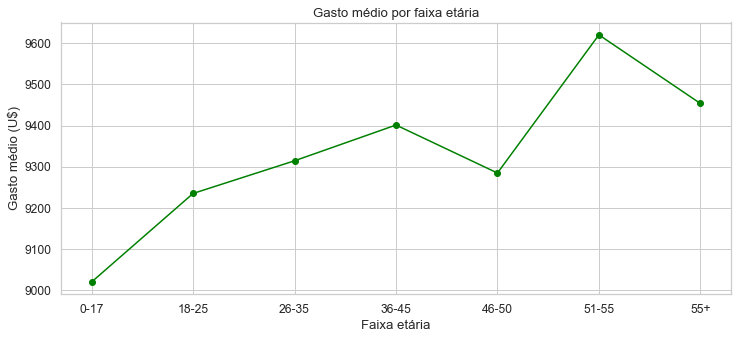

In [31]:
age_purchase = black_friday.groupby('Age')['Purchase'].mean()
age_purchase = pd.DataFrame({'Age':age_purchase.index, 'Average_purchase':age_purchase.values})
plt.plot('Age', 'Average_purchase', 'go-', data=age_purchase, );
plt.xlabel('Faixa et√°ria')
plt.ylabel('Gasto m√©dio (U$)')
plt.title('Gasto m√©dio por faixa et√°ria');

As compras de maior valor s√£o realizadas pelos consumidores que possuem entre 51 e 55 anos.

* **Qual a rela√ß√£o entre o consumo e tempo de convi√™ncia?**

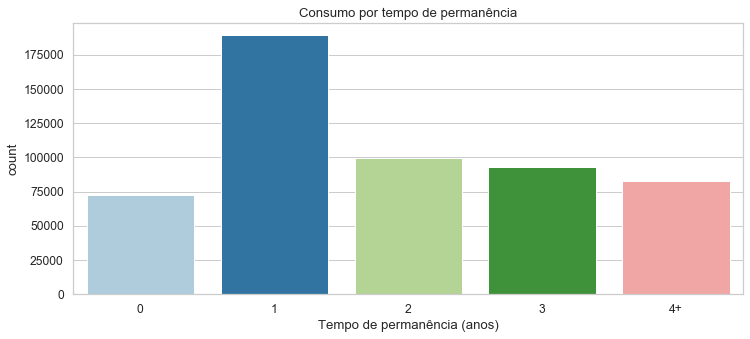

In [42]:
current_order = sorted(black_friday['Stay_In_Current_City_Years'].unique())
sns.countplot(x='Stay_In_Current_City_Years', order=current_order, data=black_friday);
plt.xlabel('Tempo de perman√™ncia (anos)')
plt.title('Consumo por tempo de perman√™ncia');

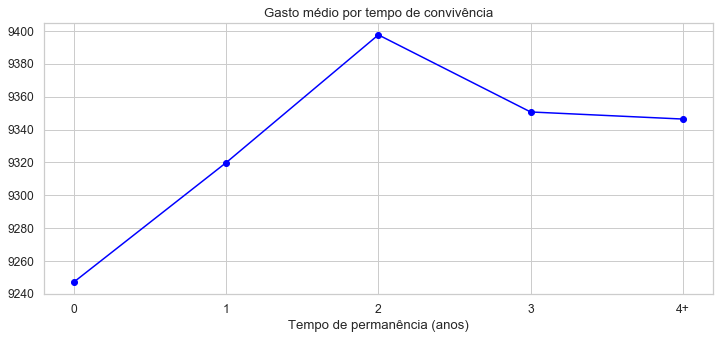

In [43]:
stay_purchase = black_friday.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
stay_purchase = pd.DataFrame({'Stay_In_Current_City_Years':stay_purchase.index, 'Average_purchase':stay_purchase.values})
plt.plot('Stay_In_Current_City_Years', 'Average_purchase', 'bo-', data=stay_purchase);
plt.xlabel('Tempo de perman√™ncia (anos)')
plt.title('Gasto m√©dio por tempo de conviv√™ncia');

Os maiores consumidores s√£o pessoas com tempo de perman√™ncia de 1 ano, por√©m compras de maior valor s√£o realizadas por moradores que possuem a partir de 2 anos de perman√™ncia.

### Quest√£o 1

* **Quantas observa√ß√µes e quantas colunas h√° no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.**

Para obtermos as dimens√µes de nosso dataframe podemos utilizar o atributo ***shape***, como demonstrado abaixo. O atributo ***shape*** nos retorna uma tupla contendo **(n¬∫ de observa√ß√µes, n¬∫ colunas)**.

In [49]:
def q1():
    return black_friday.shape

In [50]:
q1()

(537577, 12)

### Quest√£o 2

* **H√° quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um √∫nico escalar.**

O m√©todo ***query*** nos permite realizar consultas em nosso dataframe utilizando express√µes booleanas. Neste caso, irei realizar uma consulta por mulheres *(Gender == F)* com idade entre 26 e 35 anos *(Age == '26-35')*. Como retorno, teremos um dataframe que satisfa√ßa a condi√ß√£o anterior, por√©m precisamos obter o n¬∫ de observa√ß√µes deste dataframe. Para isso basta utilizarmos o atributo ***shape***, acessando sua primeira posi√ß√£o.

In [52]:
def q2():
    return black_friday.query("Gender == 'F' & Age == '26-35'").shape[0]

In [53]:
q2()

49348

### Quest√£o 3

* **Quantos usu√°rios √∫nicos h√° no dataset? Responda como um √∫nico escalar.**

O m√©todo [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) retorna os elementos √∫nicos de uma Series ou DataFrame. Os elementos s√£o retornados por ordem de apar√™ncia, portanto n√£o s√£o ordenados. Como retorno, iremos obter um *array* contendo os usu√°rios √∫nicos, por fim, basta retornamos o tamanho do array atrav√©s de *len()*.

In [55]:
def q3():
    return len(black_friday['User_ID'].unique())

In [56]:
q3()

5891

### Quest√£o 4

* **Quantos tipos de dados diferentes existem no dataset? Responda como um √∫nico escalar.**

O atributo [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) retorna uma Series contendo os tipos dos dados existente em nosso dataframe. Como estamos interessados apenas na quantidade de tipos √∫nicos, utilizamos o m√©todo *unique* em conjunto com o *len*.

In [7]:
def q4():
    return len(black_friday.dtypes.unique())

### Quest√£o 5

* **Qual porcentagem dos registros possui ao menos um valor null (`None`, `«∏aN` etc)? Responda como um √∫nico escalar entre 0 e 1.**

Para obter a porcentagem dos registros possu√≠rem ao menos um valor nulo, iremos utilizar o conceito de [probabilidade](https://geekiegames.geekie.com.br/blog/probabilidade-condicional). A probabilidade de um evento ocorrer √© dada por:  
$$
Probabilidade = \frac{casos}{observa√ß√µes}
$$

Nossos casos favor√°veis s√£o a quantidade de registros que possuem ao menos um valor nulo, ou seja, a quantidade m√°xima de ocorr√™ncia de registros nulos em uma coluna. E para obtermos o n√∫mero total de observa√ß√µes, basta acessarmos a primeira posi√ß√£o da tupla retornada por *shape*. Realizando a divis√£o de casos favor√°veis pelo n√∫mero total de observa√ß√µes, iremos obter um valor entre 0 e 1 *(0 ‚â§ p ‚â§1)* indicando a porcentagem dos registros possu√≠rem ao menos um valor nulo. 
    

In [57]:
def q5():
    return black_friday.isnull().sum().max() / black_friday.shape[0]

O m√©todo [isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) retorna um array de booleanos, com True para valores nulos. A soma de valores nulos por atributo pode ser obtida atrav√©s de [sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) e o valor m√°ximo de registros nulos contidos em um coluna atrav√©s de [max](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html).

In [59]:
print(f'{q5():.2f}')

0.69


### Quest√£o 6

* **Quantos valores null existem na vari√°vel (coluna) com o maior n√∫mero de null? Responda como um √∫nico escalar.**

Como precisamos obter a quantidade m√°xima de valores nulos em uma coluna para calcular a probabilidade na quest√£o anterior, o exerc√≠cio 6 est√° resolvido. Mas ao inv√©s de utilizar o m√©todo *isnull*, irei utilizar [isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) para demonstrar que ambos possuem a mesma fun√ß√£o, detectar valores nulos. Por fim, basta obtermos a soma de registros nulos por coluna com *sum* e a coluna com quantidade m√°xima utilizando *max*.

In [61]:
def q6():
    return black_friday.isna().sum().max()

In [62]:
q6()

373299

### Quest√£o 7

* **Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um √∫nico escalar.**

O valor mais frequente em um conjunto de dados √© uma medida estat√≠stica de tend√™ncia central, conhecida como ***moda***. Podemos obter a moda de **Product_Category_3** atrav√©s do m√©todo [mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html). O m√©todo mode ir√° nos retornar uma Series contendo √≠ndice e a moda para categoria. A moda em um √∫nico escalar pode ser obtidada atrav√©s do atributo ***values[0]***.

In [10]:
def q7():
    return black_friday['Product_Category_3'].mode().values[0]

In [34]:
type(black_friday['Product_Category_3'].mode())

pandas.core.series.Series

### Quest√£o 8

* **Qual a nova m√©dia da vari√°vel (coluna) `Purchase` ap√≥s sua normaliza√ß√£o? Responda como um √∫nico escalar.**

Antes de obtermos a m√©dia da coluna *Purchase*, precisamos normaliz√°-la. Mas o que √© normaliza√ß√£o e qual sua fun√ß√£o?

A grande maioria dos algoritmos de *Machine Learning* n√£o funcionam t√£o bem quando atributos num√©ricos possuem **escalas muito diferentes**, como √© o caso de *Product_Category_1 (valores entre 1 e 18)* e *Purchase (valores entre 185 e 23961)*. 

In [40]:
black_friday['Product_Category_1'].min(), black_friday['Product_Category_1'].max()

(1, 18)

In [41]:
black_friday['Purchase'].min(), black_friday['Purchase'].max()

(185, 23961)

Dessa forma, os algoritmos podem atribuir maior peso para atributos com escalas maiores, o que pode n√£o representar a realidade do problema. Iremos abordar duas formas de todos os atributos obterem a mesma escala: ***min-max e padroniza√ß√£o***.  

Nesta quest√£o ser√° utilizado o escalonamento ***min_max***, tamb√©m conhecido como **normaliza√ß√£o**. Sua fun√ß√£o √© redimensionar os valores para o intervalo entre 0 a 1, dessa forma todos os atributos ir√£o possu√≠r a mesma escala. Isso √© feito subtruindo o valor pelo valor m√≠nimo e dividindo pelo m√°ximo menos o m√≠nimo. 

$$
X_{changed} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$



In [64]:
def q8():
    return ((black_friday['Purchase'] - black_friday['Purchase'].min())/
           (black_friday['Purchase'].max()-black_friday['Purchase'].min())).mean()

In [65]:
q8()

0.38479390362696736

O processo de normaliza√ß√£o tamb√©m pode ser realizado atrav√©s da biblioteca [MinMaxScaler](sklearn.preprocessing.MinMaxScaler). Conforme demonstrado abaixo:

In [63]:
min_max = MinMaxScaler()
purchase_normalized = min_max.fit_transform(black_friday['Purchase'].values.reshape(-1, 1))
purchase_normalized.mean()

0.3847939036269795

### Quest√£o 9

* **Quantas ocorr√™ncias entre -1 e 1 inclusive existem da vari√°el `Purchase` ap√≥s sua padroniza√ß√£o? Responda como um √∫nico escalar.**

A outra forma dos atributos possu√≠rem a mesma escala √© atrav√©s da t√©cnica de ***padroniza√ß√£o***. A padroniza√ß√£o n√£o vincula os dados a um intervalo espec√≠fico, como no escalonamento *min-max*. Ela subtrai o valor m√©dio e, em seguida, divide pela vari√¢ncia. A padroniza√ß√£o √© feita atrav√©s da f√≥rmula *z-score*:

$$
z = \frac{x - \mu }{\sigma}
$$

Assim como na transforma√ß√£o *min-max*, o Scikit-Learn tamb√©m oferece um transformador para padroniza√ß√£o, chamado [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [27]:
standard = StandardScaler()
purchase_standardized = standard.fit_transform(black_friday['Purchase'].values.reshape(-1, 1))

In [28]:
def q9():
    return len(purchase_standardized[(purchase_standardized > -1) & (purchase_standardized < 1)])

### Quest√£o 10

* **Podemos afirmar que se uma observa√ß√£o √© null em `Product_Category_2` ela tamb√©m o √© em `Product_Category_3`? Responda com um bool (`True`, `False`).**

Primeiramente, obtive um um dataframe auxiliar contendo todas as observa√ß√µes em que o atributo *Product_Category_2* √© nulo. O m√©todo *sum()* n√£o contabiliza valores nulos, portanto a soma de uma coluna nula ser√° 0. Dessa forma, apenas verifiquei se a soma de ambas colunas (*Product_Category_2 e Product_Category_3*) s√£o iguais, ou seja, 0. Se a condi√ß√£o for satisfeita, toda observa√ß√£o nula em *Product_Category_2* ser√° nula em *Product_Category_3*.

In [16]:
def q10():
    aux = black_friday[black_friday['Product_Category_2'].isnull()]
    return bool(aux['Product_Category_2'].sum() == aux['Product_Category_3'].sum())

### Refer√™ncias
* [M√£os √† Obra: Aprendizado de M√°quina com Scikit-Learn & TensorFlow](https://www.amazon.com.br/M%C3%A3os-Obra-Aprendizado-Scikit-Learn-TensorFlow/dp/8550803812)
* [Python Para An√°lise de Dados: Tratamento de Dados com Pandas, NumPy e IPython](https://www.amazon.com.br/Python-Para-An%C3%A1lise-Dados-Tratamento/dp/8575226479/ref=asc_df_8575226479/?tag=googleshopp00-20&linkCode=df0&hvadid=379739109739&hvpos=&hvnetw=g&hvrand=13792364004803021218&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1001599&hvtargid=pla-812784633558&psc=1)
* [Geekie Games - Probabilidade Condicional](https://geekiegames.geekie.com.br/blog/probabilidade-condicional)  
* [Data Hackers - Normalizar ou padronizar as vari√°veis?](https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9)

Deixa sua cr√≠tica ou sugest√£o e me ajude a evoluirüòâ
* [LinkedIn](https://www.linkedin.com/in/bruno-dorneles/)
* [GitHub](https://github.com/BrunoDorneles)

<img src="bye.gif" width="500" height="500"/>